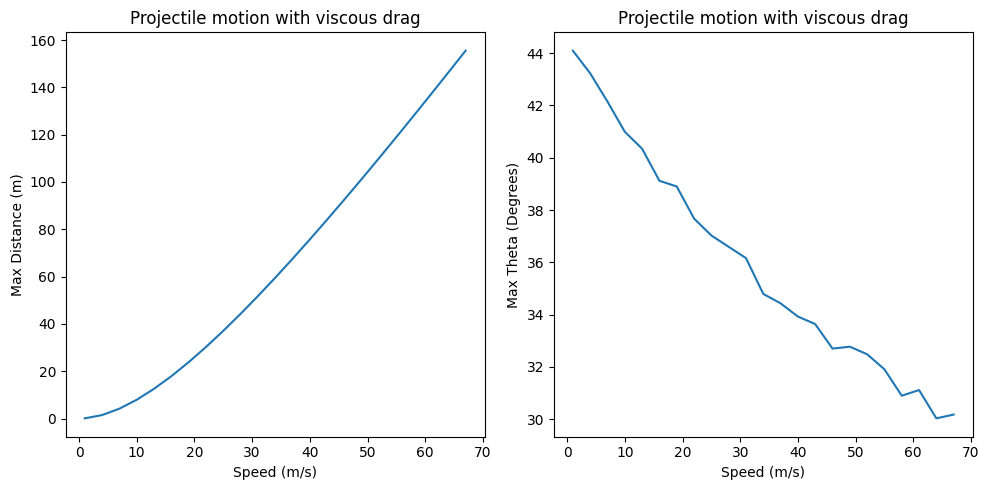

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function for projectile motion with viscous drag
def projectile_motion(v, theta, eta=0.3, g=9.81):
    vx = v * np.cos(theta)
    vz = v * np.sin(theta)
    r = np.array([0, 0, vx, vz], float)
    h = 0.01  # Step size
    t = 0
    x_points = []
    z_points = []
    while r[1] >= 0:
        x_points.append(r[0])
        z_points.append(r[1])
        dx = r[2]
        dz = r[3]
        dvx = -eta * r[2]
        dvz = -g - eta * r[3]
        k1 = h * np.array([dx, dz, dvx, dvz])
        k2 = h * np.array([dx + k1[0] / 2, dz + k1[1] / 2, dvx + k1[2] / 2, dvz + k1[3] / 2])
        k3 = h * np.array([dx + k2[0] / 2, dz + k2[1] / 2, dvx + k2[2] / 2, dvz + k2[3] / 2])
        k4 = h * np.array([dx + k3[0], dz + k3[1], dvx + k3[2], dvz + k3[3]])
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h
    return max(x_points)

# Constants
eta = 0.3
g = 9.81
speeds = np.arange(1, 70, 3)
angles = np.linspace(np.pi / 10, np.pi / 2, 1000)

max_distances = []
max_thetas = []

# Compute max distance and corresponding launch angle for each speed
for v in speeds:
    max_dist = max(projectile_motion(v, theta) for theta in angles)
    max_distances.append(max_dist)
    max_theta = np.degrees(angles[np.argmax([projectile_motion(v, theta) for theta in angles])])
    max_thetas.append(max_theta)

# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(speeds, max_distances)
plt.xlabel('Speed (m/s)')
plt.ylabel('Max Distance (m)')
plt.title('Projectile motion with viscous drag')

plt.subplot(1, 2, 2)
plt.plot(speeds, max_thetas)
plt.xlabel('Speed (m/s)')
plt.ylabel('Max Theta (Degrees)')
plt.title('Projectile motion with viscous drag')

plt.tight_layout()
plt.show()